In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns

In [60]:
data1= pd.read_csv("C:\\Users\\prasa\\Downloads\\delivery_time.csv")

In [8]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data1.shape #No of Rows and Columns

(21, 2)

In [10]:
data1.dtypes #gives the Data types of columns

Delivery Time    float64
Sorting Time       int64
dtype: object

In [11]:
data1.info() #describes the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
data1[data1.duplicated()].shape # checking for any duplicated values and there is no duplicate values

(0, 2)

In [13]:
data=data1.rename({'Delivery Time': 'delivery_time', 'Sorting Time':'sorting_time'}, axis=1) #renaming the Columns
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:>

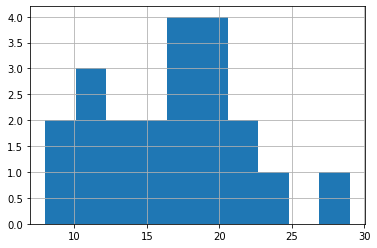

In [23]:
data['delivery_time'].hist()

In [ ]:
#histogram for delivery_time doesn't follows normal distibution as it is not bell shaped and it has positive skewness.

<AxesSubplot:>

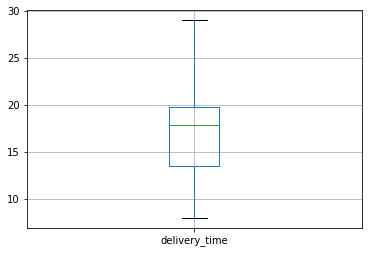

In [62]:
data.boxplot(column=['delivery_time']) #no outliers in the boxplot and median is around 18

<AxesSubplot:>

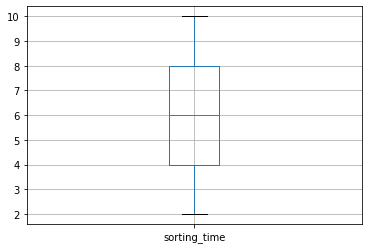

In [63]:
data.boxplot(column=['sorting_time']) #no outlier values in sorting time and median is 6

In [15]:
data.corr() #correlation coefficients

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

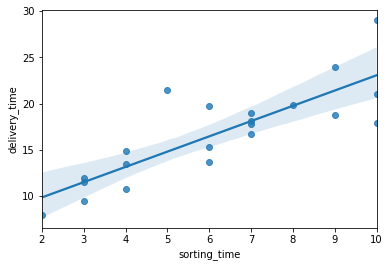

In [21]:
sns.regplot(x=data['sorting_time'], y=data['delivery_time']) #scatter plot for the data

In [20]:
%matplotlib inline

In [66]:
# Model Building 
import statsmodels.formula.api as smf
model = smf.ols('delivery_time ~ sorting_time', data = data).fit() #creating a model for the data

In [29]:
# model parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [31]:
print(model.tvalues, '\n', model.pvalues) #tvalues and pvalues for the created model

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [46]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        15:27:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#here R-squared value should b >0.8 for the good model and p value should b <0.05. so we need to improove the values.

In [80]:
newdata=pd.Series([7,10])  #predicting values for sorting_time

In [81]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,10


In [82]:
model.predict(data_pred) #checking the model with predicted values

0    18.125873
1    23.072933
dtype: float64

In [83]:
preds = model.predict(data.sorting_time)

In [84]:
preds

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [74]:
from ml_metrics import mse
np.sqrt(mse(data.delivery_time,preds))  # predicting delivery_time with RMSE

2.7916503270617654